In [10]:
import numpy as np

import kcap_methods as km
import score_compression as sc
import deriv_stepsize_investigation as dsi

import matplotlib.pyplot as plt
import os

In [11]:
step_sizes = np.array([])
for value in [0.00001, 0.0001, 0.001, 0.01]:
    for i in range(9):
        step_sizes = np.append(step_sizes, value * (i+1))
step_sizes = np.append(step_sizes, 0.1)

step_size_names = np.array([])
# for value in [0.00001, 0.0001, 0.001, 0.01]:
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.00001 * (i+1):.5f}")
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.0001 * (i+1):.4f}")
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.001 * (i+1):.3f}")
for i in range(9):
    step_size_names = np.append(step_size_names, f"{0.01 * (i+1):.2f}")
step_size_names = np.append(step_size_names, 0.1)

# Define the system of parameters

In [12]:
param_names = ['cosmological_parameters--omch2', 'cosmological_parameters--ombh2',
               'cosmological_parameters--sigma_8', 'cosmological_parameters--n_s',
               'intrinsic_alignment_parameters--a', 'halo_model_parameters--a']

default_stepsizes = [0.01, 0.01, 0.01, 0.01, 0.001, 0.01]

mocks_dir_3pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_3pt"
mocks_dir_5pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_5pt"
mocks_dir_7pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_7pt"
mocks_dir_9pt = "/home/ruyi/cosmology/kcap_output/kids_deriv_stepsize_test_9pt"
mocks_name = "kids_stepsize"

# Calculate the derivatives for varying stepsizes and plot them

Text(0.5, 0, 'cosmological_parameters--omch2')

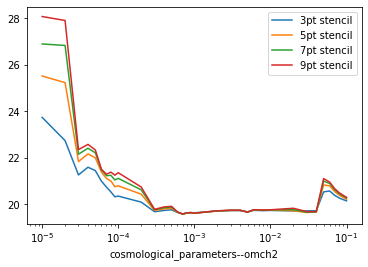

In [13]:
param_index = 0
this_param = param_names[param_index]

fom_vals_3pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_3pt, 
                            mocks_name = mocks_name)

fom_vals_5pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_5pt, 
                            mocks_name = mocks_name)

fom_vals_7pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_7pt, 
                            mocks_name = mocks_name)

fom_vals_9pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_9pt, 
                            mocks_name = mocks_name)

fig, ax = plt.subplots()
plot_3pt = ax.plot(step_sizes, fom_vals_3pt, label = "3pt stencil")
plot_5pt = ax.plot(step_sizes, fom_vals_5pt, label = "5pt stencil")
plot_7pt = ax.plot(step_sizes, fom_vals_7pt, label = "7pt stencil")
plot_9pt = plt.plot(step_sizes, fom_vals_9pt, label = "9pt

In [ ]:
 stencil")
ax.legend()

plt.xscale('log')
plt.xlabel(this_param)

Text(0.5, 0, 'cosmological_parameters--ombh2')

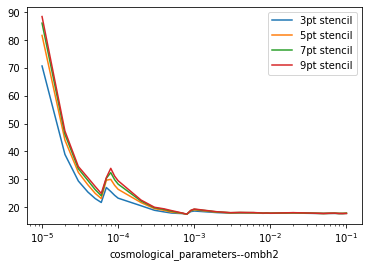

In [14]:
param_index = 1
this_param = param_names[param_index]

fom_vals_3pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_3pt, 
                            mocks_name = mocks_name)

fom_vals_5pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_5pt, 
                            mocks_name = mocks_name)

fom_vals_7pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_7pt, 
                            mocks_name = mocks_name)

fom_vals_9pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_9pt, 
                            mocks_name = mocks_name)

fig, ax = plt.subplots()
plot_3pt = ax.plot(step_sizes, fom_vals_3pt, label = "3pt stencil")
plot_5pt = ax.plot(step_sizes, fom_vals_5pt, label = "5pt stencil")
plot_7pt = ax.plot(step_sizes, fom_vals_7pt, label = "7pt stencil")
plot_9pt = plt.plot(step_sizes, fom_vals_9pt, label = "9pt stencil")
ax.legend()

plt.xscale('log')
plt.xlabel(this_param)

Text(0.5, 0, 'cosmological_parameters--sigma_8')

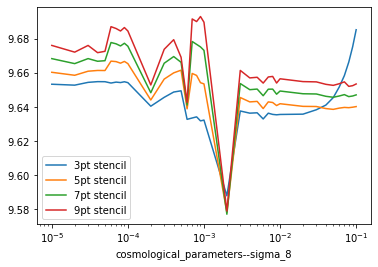

In [15]:
param_index = 2
this_param = param_names[param_index]

fom_vals_3pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_3pt, 
                            mocks_name = mocks_name)

fom_vals_5pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_5pt, 
                            mocks_name = mocks_name)

fom_vals_7pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_7pt, 
                            mocks_name = mocks_name)

fom_vals_9pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_9pt, 
                            mocks_name = mocks_name)

fig, ax = plt.subplots()
plot_3pt = ax.plot(step_sizes, fom_vals_3pt, label = "3pt stencil")
plot_5pt = ax.plot(step_sizes, fom_vals_5pt, label = "5pt stencil")
plot_7pt = ax.plot(step_sizes, fom_vals_7pt, label = "7pt stencil")
plot_9pt = plt.plot(step_sizes, fom_vals_9pt, label = "9pt stencil")
ax.legend()

plt.xscale('log')
plt.xlabel(this_param)

Text(0.5, 0, 'cosmological_parameters--n_s')

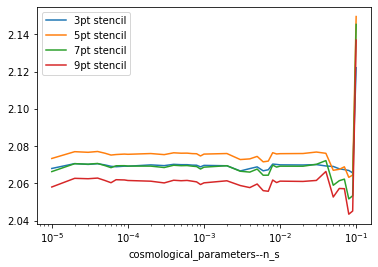

In [16]:
param_index = 3
this_param = param_names[param_index]

fom_vals_3pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_3pt, 
                            mocks_name = mocks_name)

fom_vals_5pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_5pt, 
                            mocks_name = mocks_name)

fom_vals_7pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_7pt, 
                            mocks_name = mocks_name)

fom_vals_9pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_9pt, 
                            mocks_name = mocks_name)

fig, ax = plt.subplots()
plot_3pt = ax.plot(step_sizes, fom_vals_3pt, label = "3pt stencil")
plot_5pt = ax.plot(step_sizes, fom_vals_5pt, label = "5pt stencil")
plot_7pt = ax.plot(step_sizes, fom_vals_7pt, label = "7pt stencil")
plot_9pt = plt.plot(step_sizes, fom_vals_9pt, label = "9pt stencil")
ax.legend()

plt.xscale('log')
plt.xlabel(this_param)

Text(0.5, 0, 'intrinsic_alignment_parameters--a')

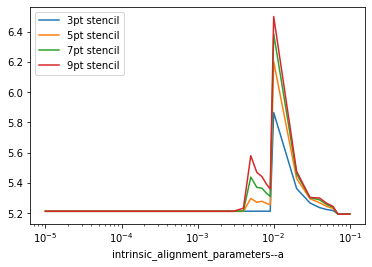

In [17]:
param_index = 4
this_param = param_names[param_index]

fom_vals_3pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_3pt, 
                            mocks_name = mocks_name)

fom_vals_5pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_5pt, 
                            mocks_name = mocks_name)

fom_vals_7pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_7pt, 
                            mocks_name = mocks_name)

fom_vals_9pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_9pt, 
                            mocks_name = mocks_name)

fig, ax = plt.subplots()
plot_3pt = ax.plot(step_sizes, fom_vals_3pt, label = "3pt stencil")
plot_5pt = ax.plot(step_sizes, fom_vals_5pt, label = "5pt stencil")
plot_7pt = ax.plot(step_sizes, fom_vals_7pt, label = "7pt stencil")
plot_9pt = plt.plot(step_sizes, fom_vals_9pt, label = "9pt stencil")
ax.legend()

plt.xscale('log')
plt.xlabel(this_param)

Text(0.5, 0, 'halo_model_parameters--a')

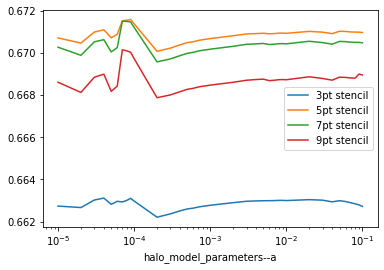

In [18]:
param_index = 5
this_param = param_names[param_index]

fom_vals_3pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_3pt, 
                            mocks_name = mocks_name)

fom_vals_5pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_5pt, 
                            mocks_name = mocks_name)

fom_vals_7pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_7pt, 
                            mocks_name = mocks_name)

fom_vals_9pt = dsi.get_fom_vals(param_index = param_index, 
                            step_sizes = step_size_names, 
                            step_size_list = default_stepsizes, 
                            data_params = ['theory'], 
                            param_names = param_names, 
                            mocks_dir = mocks_dir_9pt, 
                            mocks_name = mocks_name)

fig, ax = plt.subplots()
plot_3pt = ax.plot(step_sizes, fom_vals_3pt, label = "3pt stencil")
plot_5pt = ax.plot(step_sizes, fom_vals_5pt, label = "5pt stencil")
plot_7pt = ax.plot(step_sizes, fom_vals_7pt, label = "7pt stencil")
plot_9pt = plt.plot(step_sizes, fom_vals_9pt, label = "9pt stencil")
ax.legend()

plt.xscale('log')
plt.xlabel(this_param)